In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sales_df = pd.read_csv("Sales.csv", parse_dates=["Date"])

In [3]:
print("Shape of dataset:", sales_df.shape)
print("\nInfo:")
print(sales_df.info())
print("\nNull values:")
print(sales_df.isnull().sum())

Shape of dataset: (113036, 18)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              113036 non-null  datetime64[ns]
 1   Day               113036 non-null  int64         
 2   Month             113036 non-null  object        
 3   Year              113036 non-null  int64         
 4   Customer_Age      113036 non-null  int64         
 5   Age_Group         113036 non-null  object        
 6   Customer_Gender   113036 non-null  object        
 7   Country           113036 non-null  object        
 8   State             113036 non-null  object        
 9   Product_Category  113036 non-null  object        
 10  Sub_Category      113036 non-null  object        
 11  Product           113036 non-null  object        
 12  Order_Quantity    113036 non-null  int64         
 13  Unit_Cost         113

In [4]:
sales_df.drop_duplicates(inplace=True)
sales_df["Year"] = sales_df["Year"].astype(int)
sales_df["Customer_Age"] = sales_df["Customer_Age"].astype(int)

sales_df.to_csv("cleaned_sales.csv", index=False)

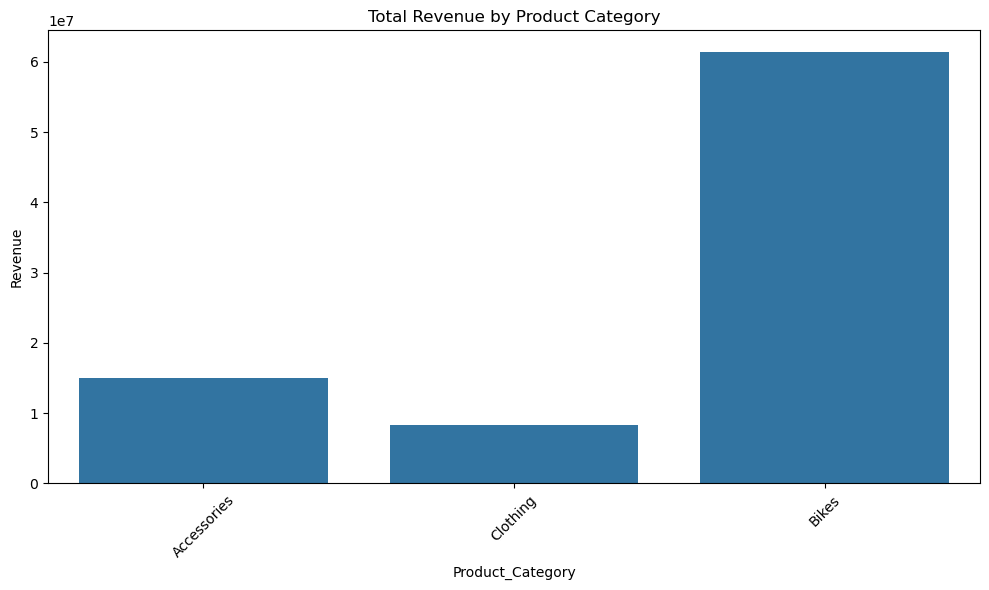

In [5]:
plt.figure(figsize=(10,6))
sns.barplot(x="Product_Category", y="Revenue", data=sales_df, estimator=sum, errorbar=None)
plt.title("Total Revenue by Product Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

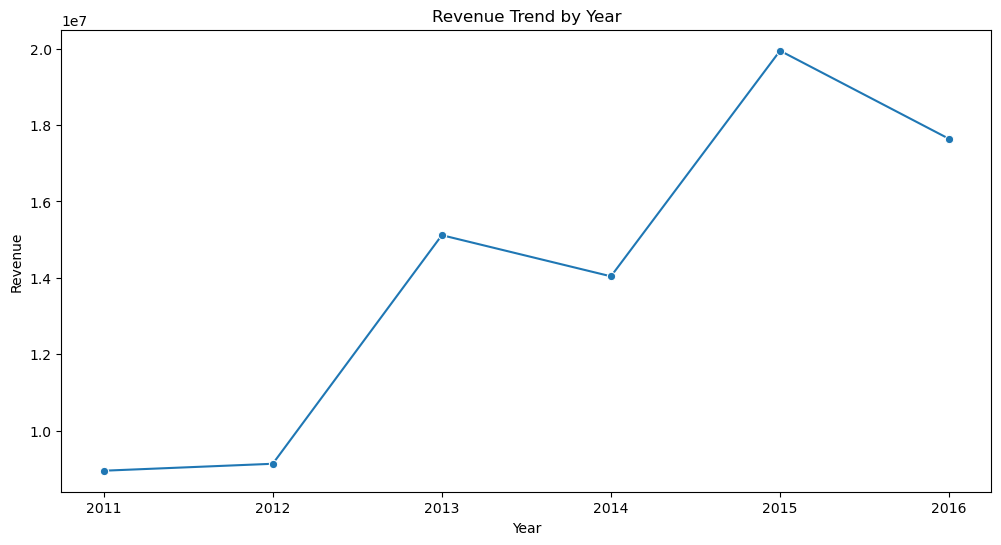

In [6]:
plt.figure(figsize=(12,6))
sales_trend = sales_df.groupby("Year")["Revenue"].sum().reset_index()
sns.lineplot(x="Year", y="Revenue", data=sales_trend, marker="o")
plt.title("Revenue Trend by Year")
plt.show()

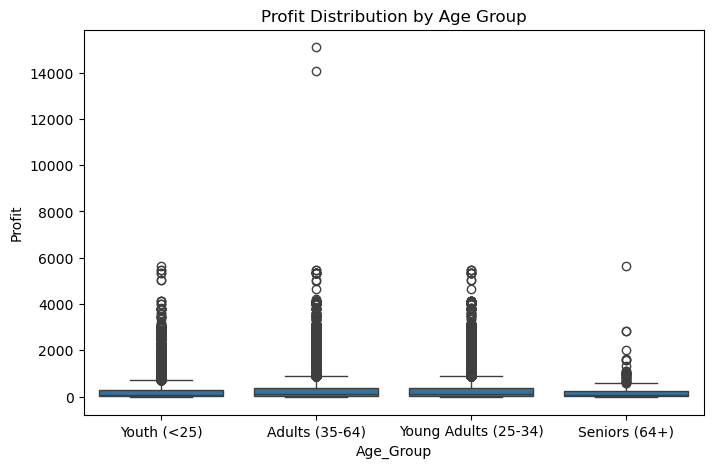

In [7]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Age_Group", y="Profit", data=sales_df)
plt.title("Profit Distribution by Age Group")
plt.show()

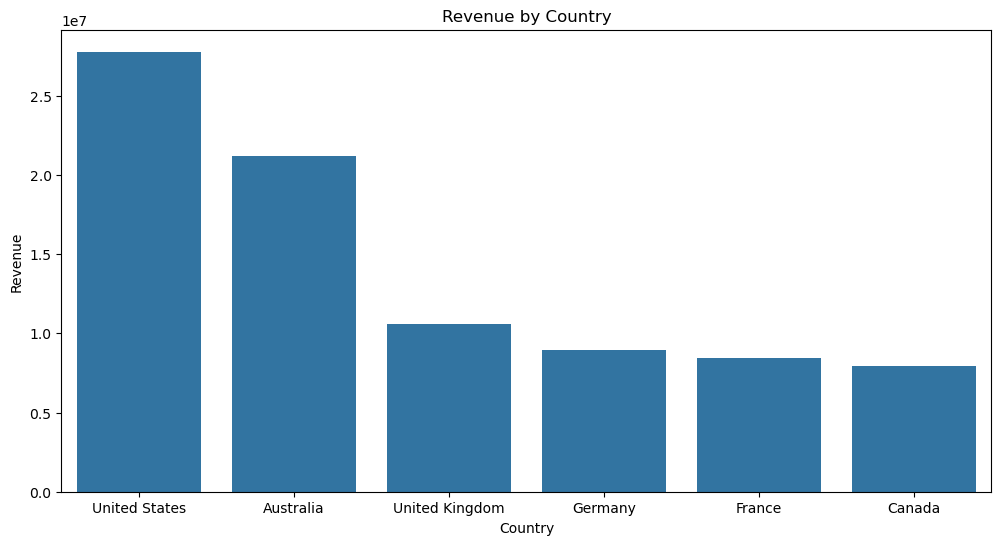

In [8]:
plt.figure(figsize=(12,6))
sns.barplot(x="Country", y="Revenue", data=sales_df, estimator=sum, errorbar=None, order=sales_df.groupby("Country")["Revenue"].sum().sort_values(ascending=False).index)
plt.title("Revenue by Country")
plt.show()

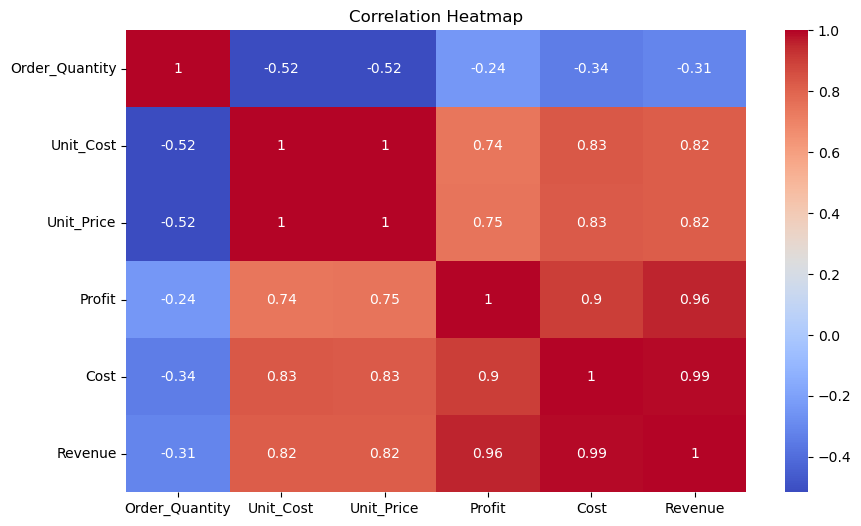

In [9]:
plt.figure(figsize=(10,6))
corr = sales_df[["Order_Quantity","Unit_Cost","Unit_Price","Profit","Cost","Revenue"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

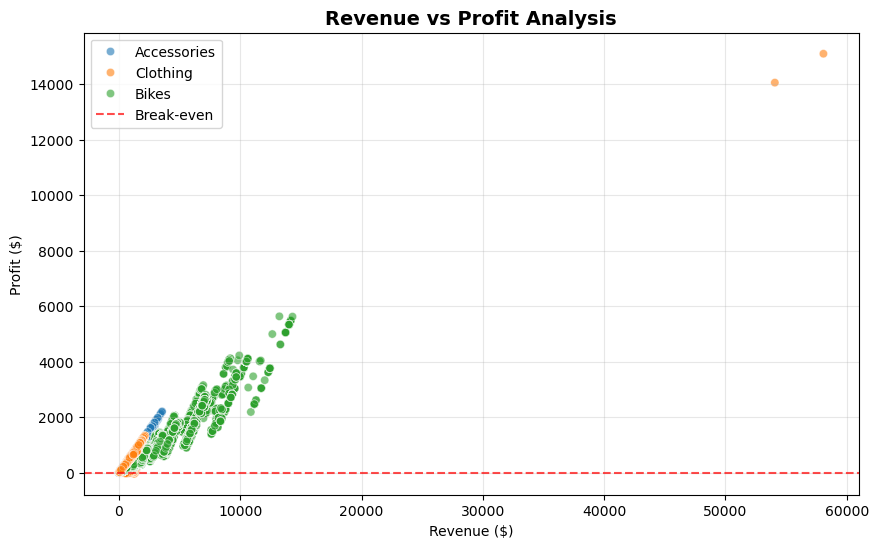

In [10]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="Revenue", y="Profit", data=sales_df, alpha=0.6, hue="Product_Category")
plt.axhline(y=0, color='red', linestyle='--', alpha=0.7, label='Break-even')
plt.title("Revenue vs Profit Analysis", fontsize=14, fontweight='bold')
plt.xlabel("Revenue ($)")
plt.ylabel("Profit ($)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()